# 图像梯度
## 目标
- 图像梯度，图像边界等
- 使用到的函数有： cv2.Sobel()， cv2.Schar()， cv2.Laplacian() 等原理  

梯度简单来说就是求导。
OpenCV 提供了三种不同的梯度滤波器，或者说高通滤波器： Sobel，
Scharr 和 Laplacian。  
我们会一一介绍他们：  
- Sobel， Scharr 其实就是求一阶或二阶导数。 Scharr 是对 Sobel（使用小的卷积核求解梯度角度时）的优化。  
- Laplacian 是求二阶导数。


## 14.1 Sobel 算子和 Scharr 算子
Sobel 算子是高斯平滑与微分操作的结合体，所以它的抗噪声能力很好。
你可以设定求导的方向（ xorder 或 yorder）。还可以设定使用的卷积核的大
小（ ksize）。如果 ksize=-1，会使用 3x3 的 Scharr 滤波器，它的的效果要
比 3x3 的 Sobel 滤波器好（而且速度相同，所以在使用 3x3 滤波器时应该尽
量使用 Scharr 滤波器）。  
3x3 的<font color=blue>Sobel滤波器卷积核</font>如下：![](sobel算子.png)
dst = cv2.Sobel(src,ddepth,dx,dy[,dst[,ksize[,scale[,delta[,borderType]]]]])
- ddepth：输出图像深度
- dx：x方向上求导
- dy：y方向上求导
- ksize：Sobel核大小，必须是1，3，5，或7，默认为3，越大线条越粗
- scale：计算导数值时采用的放缩隐私，默认情况下时1
- delta：加载目标图像dst上的值，可选参数，默认为0
- borderType：边界样式   
直接进行使用会有汗多不理想的地方  

3x3 的<font color=red>Scharr滤波器卷积核如下</font>：![](Scharr_kernel.png)  

## 14.2 Laplacian 算子
拉普拉斯算子可以使用二阶导数的形式定义，具有旋转不变性，可以满足不同方向的图像边缘锐化的要求，可假设其离散实现类似于二阶 Sobel 导数，事实上， OpenCV 在计算拉普拉斯算子时直接调用 Sobel 算子。计算公式如下:
$$\Delta src = \frac{\partial^2 src}{\partial x^2}+\frac{\partial^2 src}{\partial y^2} $$  
拉普拉斯滤波器使用的卷积核：  
$$
kernel = 
\left[
\begin{matrix}
0 & 1 & 0\\
1 & -4 & 1 \\
0 & 1 & 0 
\end{matrix} \right]
$$  

## 一个重要的事!
在查看上面这个例子的注释时不知道你有没有注意到：当我们可以通过参
数 -1 来设定输出图像的深度（数据类型）与原图像保持一致，但是我们在代
码中使用的却是 cv2.CV_64F。这是为什么呢？想象一下一个从黑到白的边界
的导数是整数，而一个从白到黑的边界点导数却是负数。如果原图像的深度是
np.int8 时，所有的负值都会被截断变成 0，换句话说就是把把边界丢失掉。
所以如果这两种边界你都想检测到，最好的的办法就是将输出的数据类型
设置的更高，比如 cv2.CV_16S， cv2.CV_64F 等。<font color=red>取绝对值</font>（所有的负数值都会变为正数，才能得到我们想要的效果）然后再把它转回
到 cv2.CV_8U。下面的示例演示了输出图片的深度不同造成的不同效果。

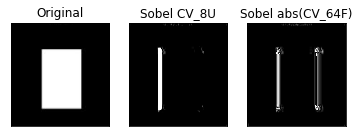

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('boxs.png',0)
# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
# 也可以将参数设为-1
#sobelx8u = cv2.Sobel(img,-1,1,0,ksize=5)
# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()

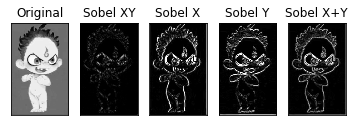

In [26]:
img = cv2.imread('natuo.png',0)

sobelxy = cv2.convertScaleAbs(cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3))
sobelx = cv2.convertScaleAbs(cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3))
sobely = cv2.convertScaleAbs(cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3))
sobelx_y = cv2.addWeighted(sobelx,0.5,sobely,0.5,1)
plt.subplot(1,5,1),plt.imshow(img,cmap='gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(1,5,2),plt.imshow(sobelxy,cmap='gray')
plt.title('Sobel XY'),plt.xticks([]),plt.yticks([])
plt.subplot(1,5,3),plt.imshow(sobelx,cmap='gray')
plt.title('Sobel X'),plt.xticks([]),plt.yticks([])
plt.subplot(1,5,4),plt.imshow(sobely,cmap='gray')
plt.title('Sobel Y'),plt.xticks([]),plt.yticks([])
plt.subplot(1,5,5),plt.imshow(sobelx_y,cmap='gray')
plt.title('Sobel X+Y'),plt.xticks([]),plt.yticks([])
plt.show()

Sobel算子与Schary

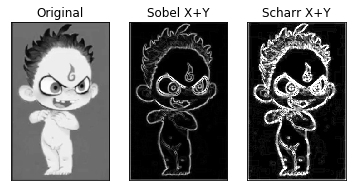

In [5]:
img = cv2.imread('natuo.png',0)

#sobelxy = cv2.convertScaleAbs(cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3))

# 参数 1,0 为只在 x 方向求一阶导数，最大可以求 2 阶导数。
sobelx = cv2.convertScaleAbs(cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3))
# 参数 0,1 为只在 y 方向求一阶导数，最大可以求 2 阶导数。
sobely = cv2.convertScaleAbs(cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3))
sobelx_y = cv2.addWeighted(sobelx,0.5,sobely,0.5,1)

#scharrxy = cv2.convertScaleAbs(cv2.Sobel(img,cv2.CV_64F,1,1)
scharrx = cv2.convertScaleAbs(cv2.Scharr(img,cv2.CV_64F,1,0))
scharry = cv2.convertScaleAbs(cv2.Scharr(img,cv2.CV_64F,0,1))
scharrx_y = cv2.addWeighted(scharrx,0.5,scharry,0.5,1)
plt.subplot(1,3,1),plt.imshow(img,cmap='gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx_y,cmap='gray')
plt.title('Sobel X+Y'),plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3),plt.imshow(scharrx_y,cmap='gray')
plt.title('Scharr X+Y'),plt.xticks([]),plt.yticks([])


plt.show()

代码  
下面的代码分别使用以上三种滤波器对同一幅图进行操作。

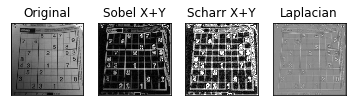

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img=cv2.imread('dave.jpg',0)
#img = cv2.imread('natuo.png',0)

#cv2.CV_64F 输出图像的深度（数据类型），可以使用-1, 与原图像保持一致 np.uint8
laplacian=cv2.Laplacian(img,cv2.CV_64F)

sobelx = cv2.convertScaleAbs(cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3))
sobely = cv2.convertScaleAbs(cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3))
sobelx_y = cv2.addWeighted(sobelx,0.5,sobely,0.5,1)

scharrx = cv2.convertScaleAbs(cv2.Scharr(img,cv2.CV_64F,1,0))
scharry = cv2.convertScaleAbs(cv2.Scharr(img,cv2.CV_64F,0,1))
scharrx_y = cv2.addWeighted(scharrx,0.5,scharry,0.5,1)

plt.subplot(1,4,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,2),plt.imshow(sobelx_y,cmap = 'gray')
plt.title('Sobel X+Y'), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,3),plt.imshow(scharrx_y,cmap = 'gray')
plt.title('Scharr X+Y'), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,4),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.show()